In [1]:
import fast_rl.core.Interpreter
import fast_rl.core.Learner 
import fast_rl.agents.DQN 
from fast_rl.agents.DQN import DQN, FixedTargetDQN, DoubleDQN, DuelingDQN, DoubleDuelingDQN
from fast_rl.core.Interpreter import AgentInterpretationAlpha
from fast_rl.core.Learner import AgentLearner
from fast_rl.core.MarkovDecisionProcess import MDPDataBunchAlpha
from fast_rl.core.agent_core import PriorityExperienceReplay, ExperienceReplay
from fast_rl.core.MarkovDecisionProcess import MDPDataBunchAlpha, FEED_TYPE_IMAGE, FEED_TYPE_STATE
from fast_rl.core.agent_core import ExperienceReplay, GreedyEpsilon
import sys
import importlib

In [2]:
data = MDPDataBunchAlpha.from_env('maze-random-5x5-v0', render='human', max_steps=1000)
model = FixedTargetDQN(data, batch_size=128, max_episodes=50, lr=0.001, copy_over_frequency=3,
                       memory=ExperienceReplay(10000), discount=0.99, 
                      exploration_strategy=GreedyEpsilon(epsilon_start=1, epsilon_end=0.1,
                                                         decay=0.001, do_exploration=True))
learn = AgentLearner(data, model)

learn.fit(50)

pygame 2.0.0.dev3 (SDL 2.0.9, python 3.6.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


unsupported format string passed to list.__format__


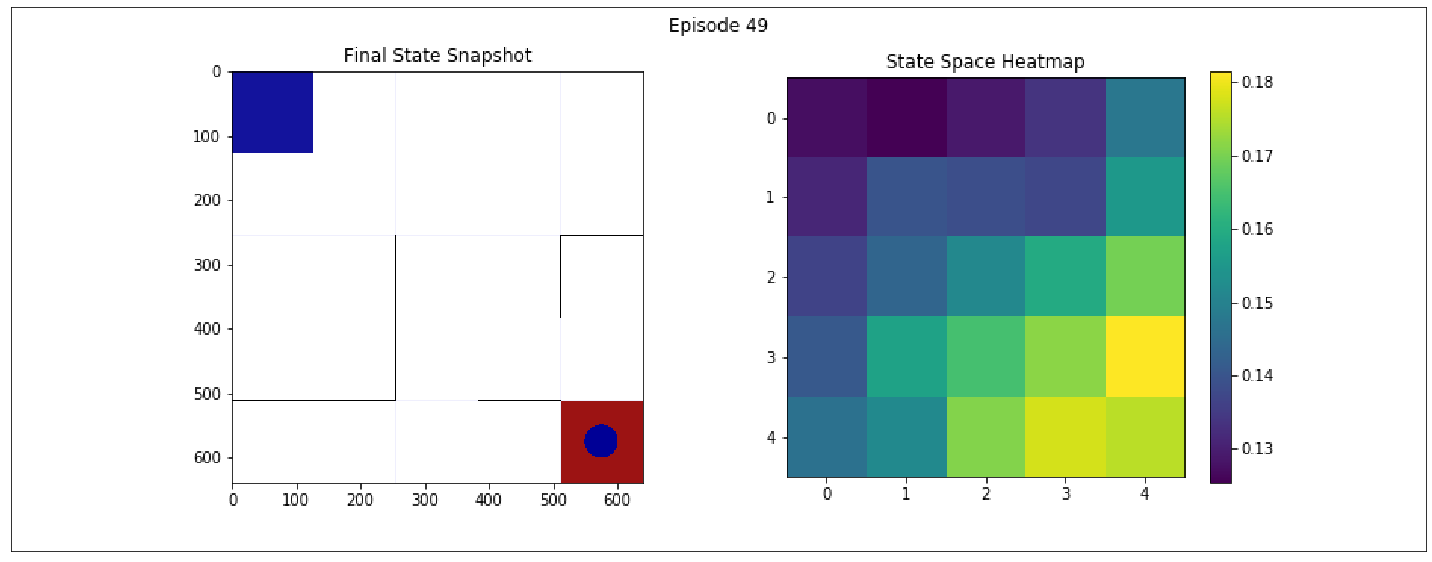

In [3]:
interp = AgentInterpretationAlpha(learn, base_chart_size=(20, 10))
interp.plot_heatmapped_episode(-1, return_heat_maps=False)

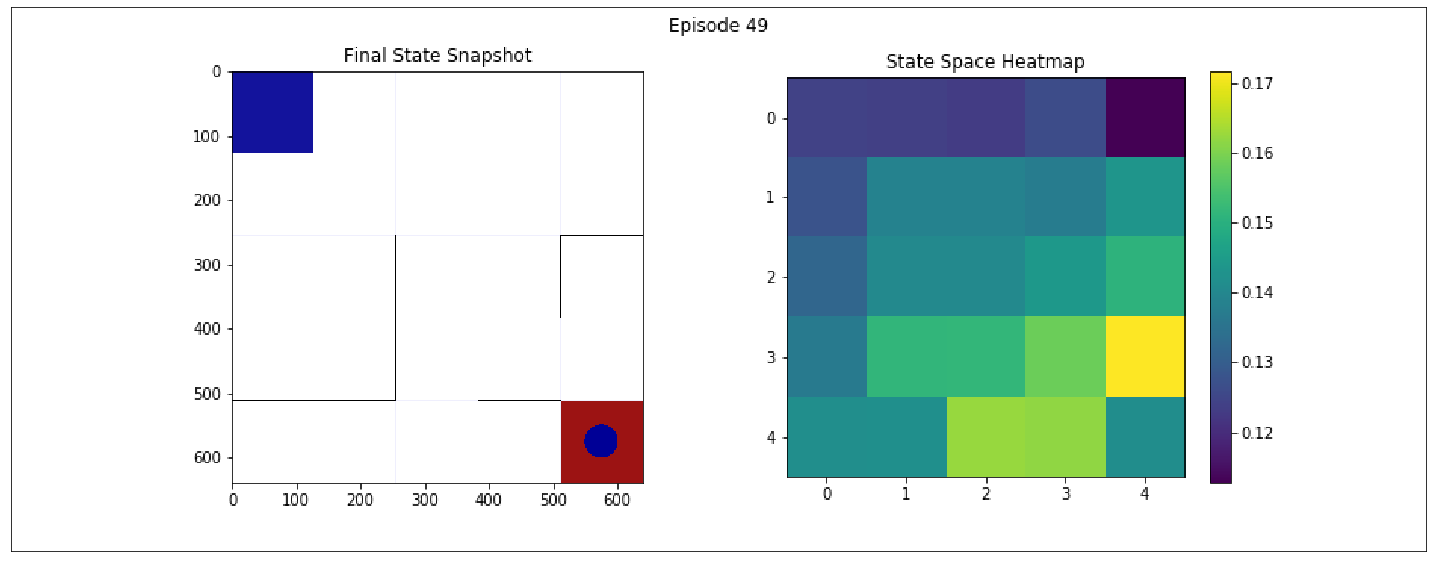

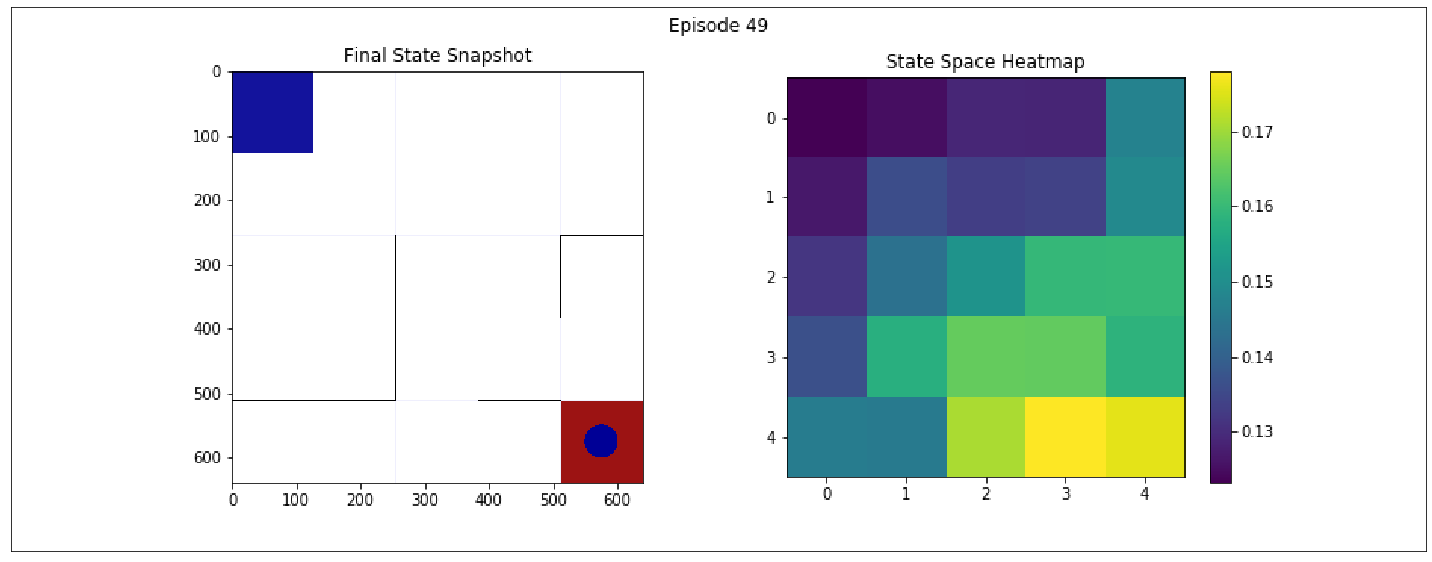

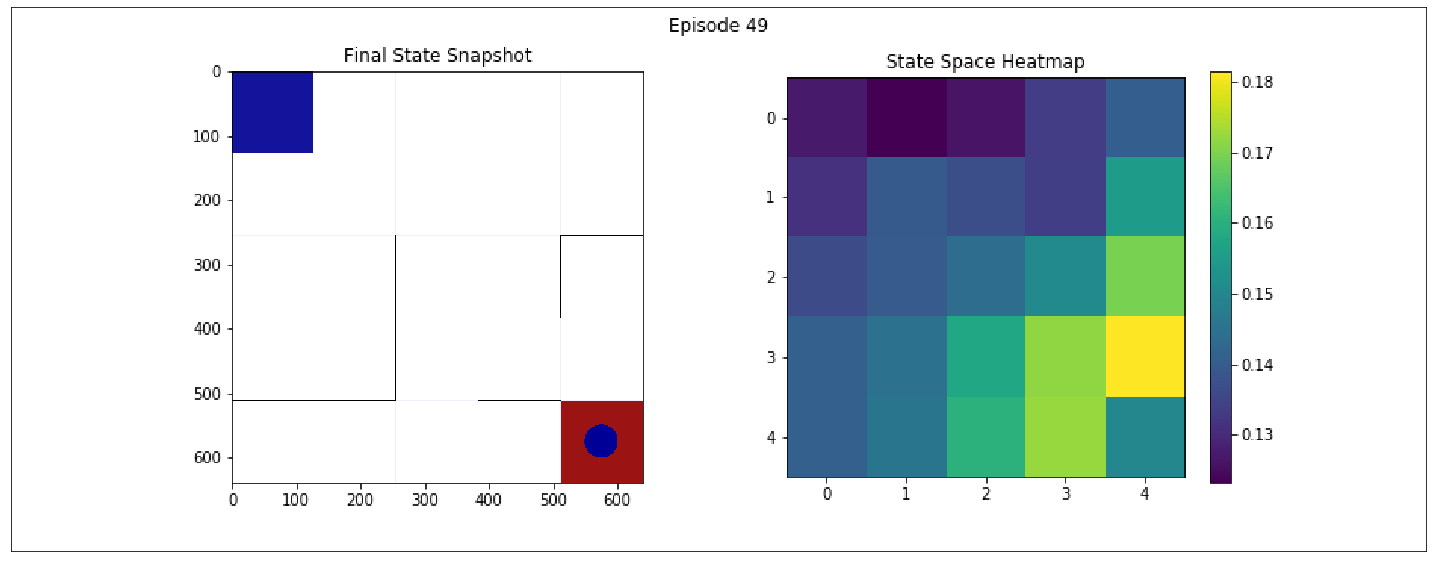

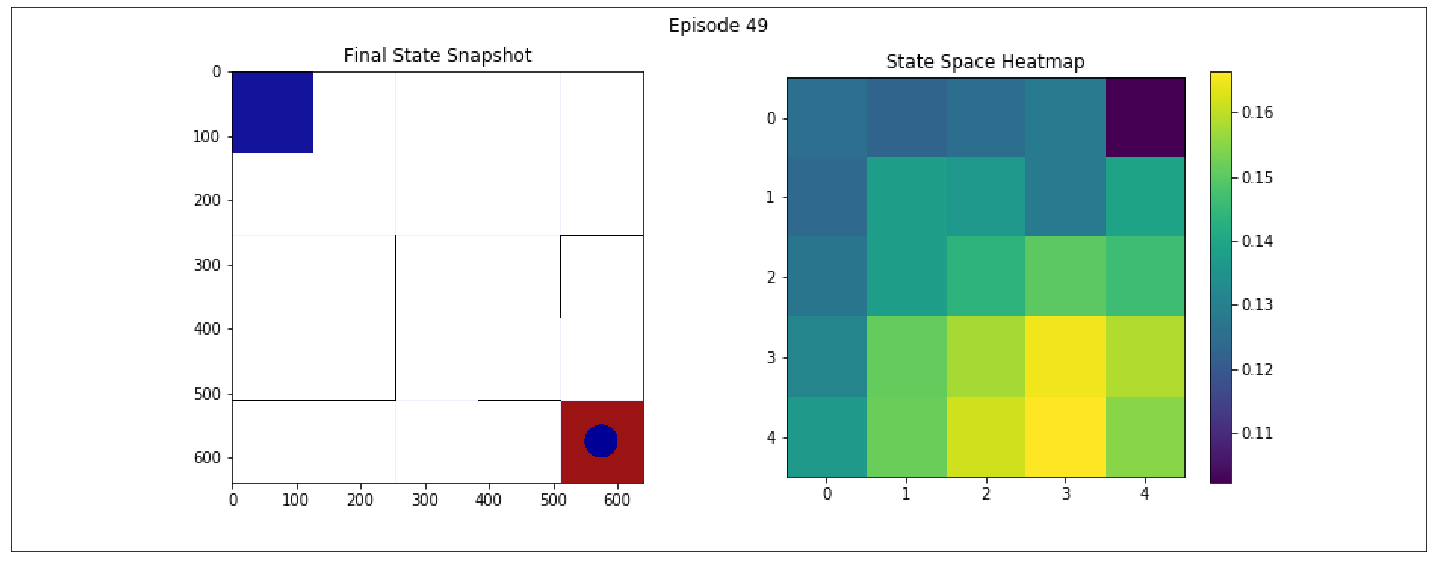

In [4]:
for i in range(4):
    interp.plot_heatmapped_episode(-1, action_index=i, return_heat_maps=False)

-1.279396092362345 -0.07939609236234499 4.109805011749268 5.309805011749267


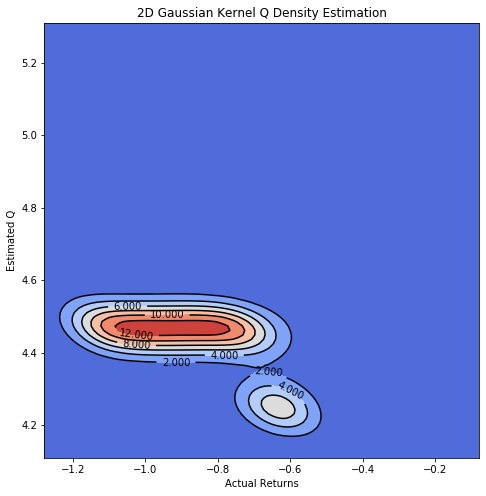

In [5]:
interp.plot_q_density()